# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading & Exploration

Bertujuan untuk memahami dan memperoleh pengetahuan lebih banyak tentang data yang akan digunakan.

## Import Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Final Project - Ruang Guru/Dataset/Final.csv")
data.head()

,id,name,age,gender,city,country,traffic_source,created_at,event_type,traffic_source_events
0,38116,JeremyWalsh,29,M,Xianyang,China,Search,2020-08-14 17:11:00,home,Email
1,29553,JoeJackson,61,M,São Borja,Brasil,Search,2019-11-08 08:37:00,home,Email
2,69021,PhillipMcdonald,15,M,New York,United States,Organic,2019-09-24 05:29:00,home,Email
3,68235,CurtisPreston,21,M,Suzhou,China,Search,2021-06-27 18:43:00,department,Email
4,32838,HeatherDiaz,37,F,Leeds,United Kingdom,Search,2020-02-11 13:51:00,home,Email


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628864 entries, 0 to 628863
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     628864 non-null  int64 
 1   name                   628864 non-null  object
 2   age                    628864 non-null  int64 
 3   gender                 628864 non-null  object
 4   city                   622693 non-null  object
 5   country                628864 non-null  object
 6   traffic_source         628864 non-null  object
 7   created_at             628864 non-null  object
 8   event_type             608850 non-null  object
 9   traffic_source_events  608850 non-null  object
dtypes: int64(2), object(8)
memory usage: 48.0+ MB


In [ ]:
data.shape

(628864, 10)

Dataset yang dipunyai memiliki 628.874 baris / rows dan 10 kolom / columns

Menampilkan kolom-kolom  yang kita punya

In [ ]:
data.columns

Index(['id', 'name', 'age', 'gender', 'city', 'country', 'traffic_source',
       'created_at', 'event_type', 'traffic_source_events'],
      dtype='object')

In [ ]:
data.describe()

,id,age
count,628864.000000,628864.000000
mean,50059.126447,41.079332
std,28830.608134,17.003595
min,1.000000,12.000000
25%,25137.000000,26.000000
50%,50141.000000,41.000000
75%,75000.000000,56.000000
max,100000.000000,70.000000


## Data Duplicated

Bertujuan untuk mengecek apakah ada data yang duplicated. Data yang digunakan untuk melakukan modeling tidak bisa mengandung duplicate value, karena akan menyebabkan terjadinya overfit pada model. 


*   **False** --> Menunjukkan tidak ada data yang duplicated
*   **True** --> Menunjukkan ada data yang duplicated



In [ ]:
data.duplicated().any()

False

Dari output diatas dapat disimpulkan bahwa data yang dimiliki tidak terdapat data yang duplicated

## Data Null

Bertujuan untuk mengecek jumlah total data null

In [ ]:
data.isna().sum()

id                           0
name                         0
age                          0
gender                       0
city                      6171
country                      0
traffic_source               0
created_at                   0
event_type               20014
traffic_source_events    20014
dtype: int64

Dari output diatas terdapat data null sebanyak **6.171 baris** di kolom city dan **20.014 baris** di kolom **event_type** dan **traffic_source_events**

Menghapus data null dengan menggunakan fungsi **dropna()**.

In [ ]:
data = data.dropna()
data

,id,name,age,gender,city,country,traffic_source,created_at,event_type,traffic_source_events
0,38116,JeremyWalsh,29,M,Xianyang,China,Search,2020-08-14 17:11:00,home,Email
1,29553,JoeJackson,61,M,São Borja,Brasil,Search,2019-11-08 08:37:00,home,Email
2,69021,PhillipMcdonald,15,M,New York,United States,Organic,2019-09-24 05:29:00,home,Email
3,68235,CurtisPreston,21,M,Suzhou,China,Search,2021-06-27 18:43:00,department,Email
4,32838,HeatherDiaz,37,F,Leeds,United Kingdom,Search,2020-02-11 13:51:00,home,Email
...,...,...,...,...,...,...,...,...,...,...
628859,30928,JohnTorres,59,M,London,United Kingdom,Display,2020-09-16 04:52:00,home,YouTube
628860,55348,RobertRoberts,27,M,Verviers,Belgium,Facebook,2020-05-07 09:05:00,department,Email
628861,75943,EricaHampton,54,F,Huntington Beach,United States,Search,2019-08-18 07:50:00,department,Facebook
628862,29923,MonicaDaniel,45,F,Guadalajara,Spain,Search,2019-12-07 09:39:00,department,Email


Mengecek kembali apakah masih terdapat data null

In [ ]:
data.isna().sum()

id                       0
name                     0
age                      0
gender                   0
city                     0
country                  0
traffic_source           0
created_at               0
event_type               0
traffic_source_events    0
dtype: int64

Dari output diatas membuktikan bahwa data null yang dimiliki sebelumnya sudah di drop / dihapus.

# 2. Exploratory Data Analysis

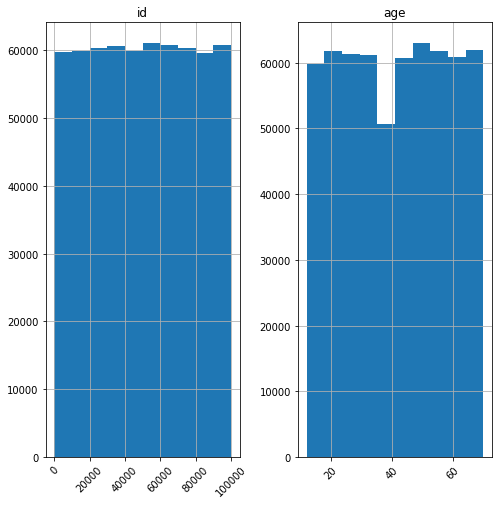

In [ ]:
data.hist(figsize=(8,8), xrot=45)
plt.show()

## Summary statistics of the Categorical features

Memberikan ringkasan statistics dari kolom categorical

In [ ]:
data.describe(include='object')

,name,gender,city,country,traffic_source,created_at,event_type,traffic_source_events
count,602845,602845,602845,602845,602845,602845,602845,602845
unique,57641,2,7614,15,5,77181,5,5
top,MichaelSmith,F,Shanghai,China,Search,2020-09-28 14:59:00,department,Email
freq,395,301973,14769,207280,422530,43,131313,240448


## Plot categorical distributions

Melakukan plotting data categorical yang memiliki jumlah unique kurang sama dengan 22.

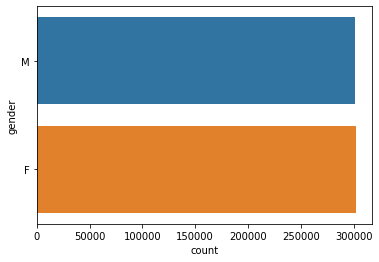

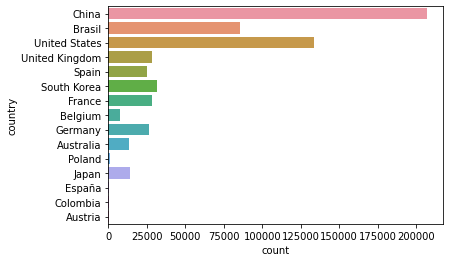

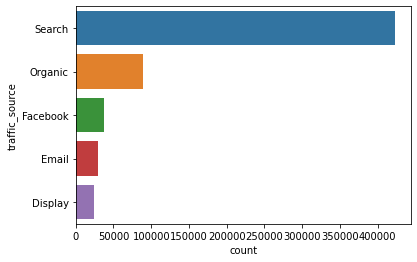

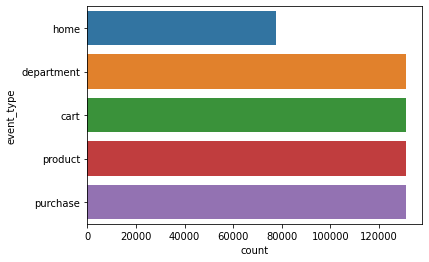

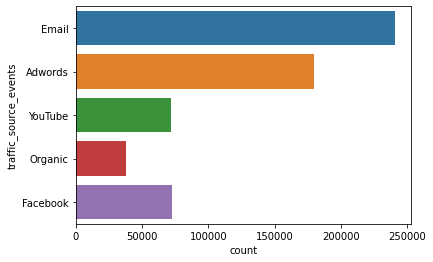

In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data)
        plt.show()

## Segment Categorical features by the target classes

#### On-the-fly data cleaning / feature engineering

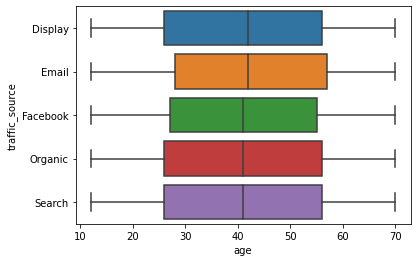

In [ ]:
num_cols = ['age']
for col in num_cols:
    sns.boxplot(y = data['traffic_source'].astype('category'), x = col, data = data)
    plt.show()

### Tabulate target across various categorical features using cross tab

Menampilkan perbandingan setiap variabel indenpenden terhadap dependen

In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=5:
        display(pd.crosstab(data['traffic_source'], data[col], normalize='index'))
        # display(pd.crosstab(data['target'], data[col]))

gender,F,M
traffic_source,,
Display,0.487489,0.512511
Email,0.505832,0.494168
Facebook,0.500483,0.499517
Organic,0.499481,0.500519
Search,0.501685,0.498315


traffic_source,Display,Email,Facebook,Organic,Search
traffic_source,,,,,
Display,1.0,0.0,0.0,0.0,0.0
Email,0.0,1.0,0.0,0.0,0.0
Facebook,0.0,0.0,1.0,0.0,0.0
Organic,0.0,0.0,0.0,1.0,0.0
Search,0.0,0.0,0.0,0.0,1.0


event_type,cart,department,home,product,purchase
traffic_source,,,,,
Display,0.218515,0.218515,0.125939,0.218515,0.218515
Email,0.217476,0.217476,0.130095,0.217476,0.217476
Facebook,0.218046,0.218046,0.127815,0.218046,0.218046
Organic,0.217558,0.217558,0.129767,0.217558,0.217558
Search,0.217843,0.217843,0.128630,0.217843,0.217843


traffic_source_events,Adwords,Email,Facebook,Organic,YouTube
traffic_source,,,,,
Display,0.294203,0.397143,0.118424,0.066356,0.123875
Email,0.304721,0.388500,0.124983,0.064430,0.117367
Facebook,0.297984,0.399582,0.118700,0.065811,0.117923
Organic,0.300017,0.397769,0.120386,0.060260,0.121568
Search,0.297742,0.399834,0.119696,0.063236,0.119492


## Count plot of target across various categorical features

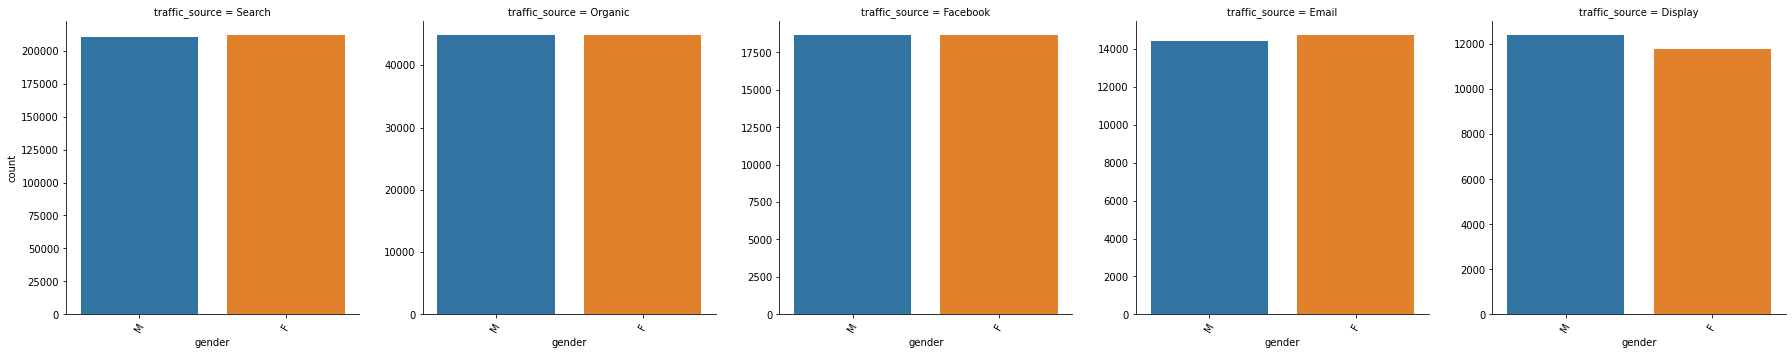

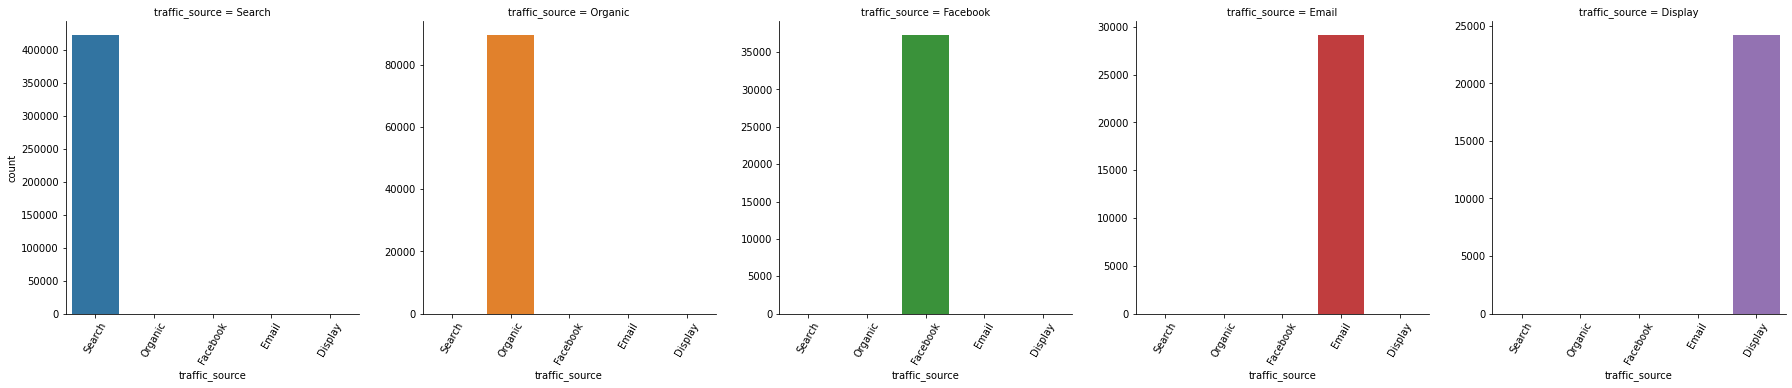

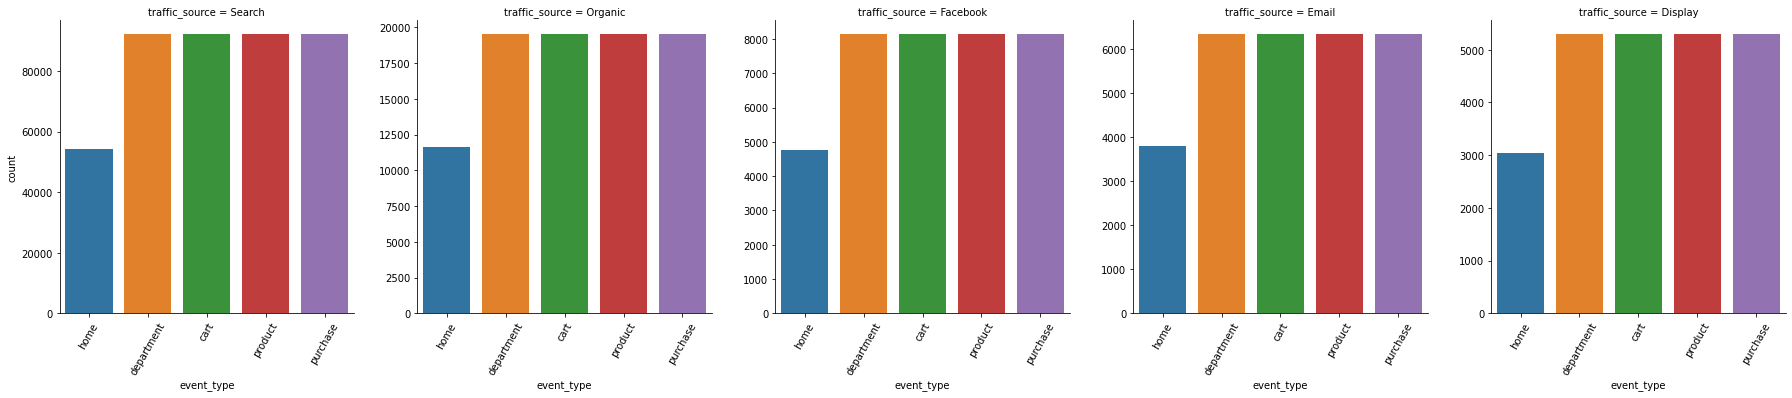

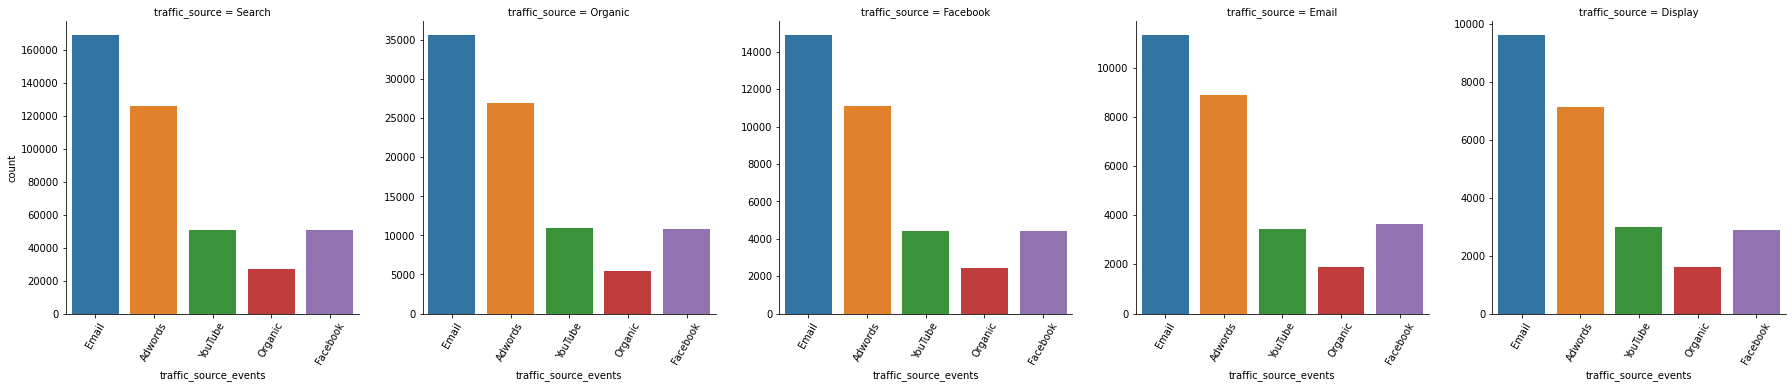

In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 5:
        g = sns.catplot(x = col, kind='count', col = 'traffic_source', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

## Group numeric features by categorical features

Menampilkan rata-rata usia disetiap gender

In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=3 :
        display(data.groupby(col)[["age"]].mean())

,age
gender,
F,41.039348
M,41.126037


Dari hasil output diatas, dapat disimpulkan bahwa rata-rata users The Look **berusia 41 tahun** baik itu **Laki-laki** maupun Perempuan

## Interactions between numeric features and other numeric features

### Correlation matrix for the various numeric features

Menampilkan correlation matrix pada data numerik

In [ ]:
corr = data.corr()
corr

,id,age
id,1.000000,-0.007351
age,-0.007351,1.000000


Dari hasil output diatas, dapat disimpulkan bahwa **id user** dan **age** memiliki **korelasi** yang **negatif**.

### Heat map of the correlations

Memvisualisasi correlation matrix menggunakan heat map

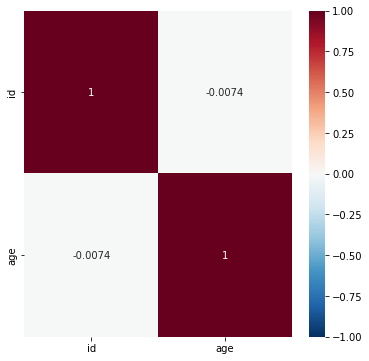

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

# 3. Modeling

## Import library

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

## Modeling Traffic Source

### Label Encoding

**Gender** 
*   Male : 1
*   Female : 0





In [ ]:
label_encoder = LabelEncoder()
data["gender"] = label_encoder.fit_transform(data["gender"])
data["city"] = label_encoder.fit_transform(data["city"])
data["country"] = label_encoder.fit_transform(data["country"])
data["traffic_source"] = label_encoder.fit_transform(data["traffic_source"])

### Split Data

Dari 10 kolom yang kita miliki, kita hanya mengambil kolom **id**, **age**, **gender**, **city**, **country**, **traffic_source** kemudian disimpan ke dalam variabel **data_traffic_source** untuk dilakukan pemodelan klasifikasi.

In [ ]:
data_traffic_source = data[["id", "age", "gender", "city", "country", "traffic_source"]]
data_traffic_source

,id,age,gender,city,country,traffic_source
0,38116,29,1,7462,4,4
1,29553,61,1,6485,3,4
2,69021,15,1,4627,14,3
3,68235,21,1,6469,4,4
4,32838,37,0,3649,13,4
...,...,...,...,...,...,...
628859,30928,59,1,3824,13,0
628860,55348,27,1,6980,2,2
628861,75943,54,0,2961,14,4
628862,29923,45,0,2582,12,4


Kemudian, mengambil kolom **id**, **age**, **gender**, **city**, dan **country** untuk menjadi variabel bebas yang disimpan dalam variable **X**.

In [ ]:
X = data_traffic_source[["id", "age", "gender", "city", "country"]]
X.head()

,id,age,gender,city,country
0,38116,29,1,7462,4
1,29553,61,1,6485,3
2,69021,15,1,4627,14
3,68235,21,1,6469,4
4,32838,37,0,3649,13


Kemudian, mengambil kolom **traffic_source** untuk menjadi **variabel terikat** / label dalam pemodelan klasifikasi yang disimpan dalam variable **y**.

In [ ]:
y = data_traffic_source["traffic_source"]
y.head()

0    4
1    4
2    3
3    4
4    4
Name: traffic_source, dtype: int64

Split dataset into training set and test set

Menggunakan **test_size = 0.2** yang berarti membagi atau splitting data dengan acuan 80 : 20 untuk training dan testing dengan **random state** sebesar **42** ke dalam modeling menggunakan **Classification** (Random Forest Classifier).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Create a Random Forest

Create a Gaussian Classifier

**n_estimators** = This is the number of trees you want to build before taking the maximum voting or averages of predictions

Menetapkan **100** number of tress

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

### Train the model

Train the model using the training sets **y_pred = clf.predict(X_test)**

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier()

Prediction on test set

In [ ]:
y_pred=clf.predict(X_test)

### Feature Importance

#### Determine feature importance values

In [ ]:
importances = clf.feature_importances_

Menampilkan pengaruh komponen variable bebas (**X**) terhadap variable terikat (**y**).

In [ ]:
columns = X_train.columns
rfc_cof = pd.Series(importances, columns)
rfc_cof

id         0.440071
age        0.169696
gender     0.024840
city       0.312994
country    0.052398
dtype: float64

Dari hasil output diatas, dapat disimpulkan bahwa id user memiliki pengaruh terbesar diikuti oleh city, age, country, dan gender

Sort the feature importance in descending order

In [ ]:
sorted_indices = np.argsort(importances)[::-1]

#### Visualize the Feature Importance

Menampilkan hasil feature importances

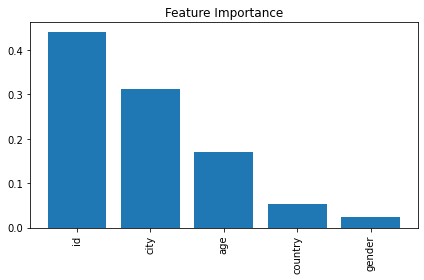

In [ ]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### Model Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9996516517512793


Dari hasil output diatas, dapat disimpulkan bahwa akurasi pemodelan klasifikasi sebesar **99%** dan dapat dikatakan baik karena mendekati 100%

# Model Evaluation

## AUROC

**AUROC ( Area Under the Receiver Operating Characteristic )** adalah salah satu metric yang dapat digunakan unutk mengevaluasi hasil pemodelan Random Forest Classifier yang sudah ditraining

### Import Library

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

### Prediction Probabilities

In [ ]:
rf_probs = clf.predict_proba(X_test)
rf_probs

array([[0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.01, 0.04, 0.95],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

### Compute the AUROC Values

In [ ]:
rf_auc = roc_auc_score(y_test, rf_probs, multi_class = "ovr")

### Display the AUROC Scores

In [ ]:
print("Random Forest : AUROC = %.3f" % (rf_auc))

Random Forest : AUROC = 1.000


Dari hasil output diatas, dapat disimpulkan bahwa pemodelan yang dibuat sudah sangat baik karena menghasilkan nilai **1** setelah dievaluasi menggunakan **AUROC Curve**.

### Calculate the ROC Curve

In [ ]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs[:, :1], pos_label = 1)

### Plot the ROC Curve

Visualisasi ROC Curve

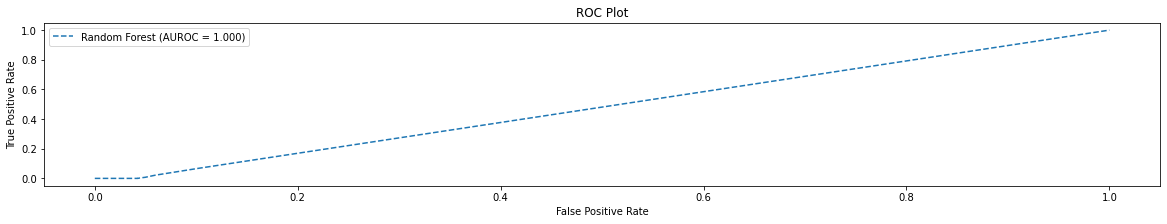

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(rf_fpr, rf_tpr, linestyle = "--", label = "Random Forest (AUROC = %.3f)" % rf_auc)

# Title
plt.title("ROC Plot")

# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
plt.show()

## Confusion Matrix

### Classification Report

Menampilkan hasil klasifikasi menggunakan Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4830
           1       1.00      1.00      1.00      5782
           2       1.00      1.00      1.00      7409
           3       1.00      1.00      1.00     18121
           4       1.00      1.00      1.00     84427

    accuracy                           1.00    120569
   macro avg       1.00      1.00      1.00    120569
weighted avg       1.00      1.00      1.00    120569



### Visualisasi Confusion Matrix

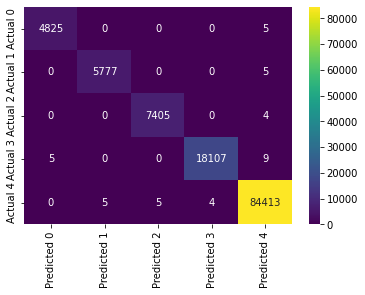

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(X_train, y_pred) : 
  labels = unique_labels(X_train)
  columns = [f"Predicted {label}" for label in labels]
  index = [f"Actual {label}" for label in labels]
  table = pd.DataFrame(confusion_matrix(X_train, y_pred), 
                       columns = columns, index = index)
  return sns.heatmap(table, annot = True, fmt = "d", cmap = "viridis")

plot_confusion_matrix(y_test, y_pred)

# Export to CSV

## Export x_train

In [ ]:
print("Export to CSV..")
X_train.to_csv("training.csv", index=False)

print("Done!")

Export to CSV..
Done!


## Export y_test

In [ ]:
print("Export to CSV..")
y_test.to_csv("testing.csv", index=False)

print("Done!")

Export to CSV..
Done!


## Export y_test

In [ ]:
print("Export to CSV..")
y_test.to_csv("prediction.csv", index=False)

print("Done!")

Export to CSV..
Done!
